In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.optimize import curve_fit
from scipy.signal import fftconvolve
from matplotlib.colors import LogNorm
from scipy import stats
import random
from scipy.interpolate import interp1d
from scipy.stats import poisson
from scipy.fft import fft, fftfreq
from pyunfold import iterative_unfold
from pyunfold.callbacks import Logger
from pyunfold.priors import jeffreys_prior, uniform_prior
import create_example


In [2]:
nevents=10000
nevents1=100000

x0 = 1836.4 # M2
gamma0 = 8.2
x1 =  2047 # M1
gamma1 = 14.49
x2 =  411.71 # M1
gamma2 = 20.
mu = 0
N_detectors = 100
sigma_0 = 5
sigma_1 = 7
x_min=0.
x_max=2600
x_nbins=130
b_min=0.
b_max=2600
b_nbins=130
type_unf= "BAYES"
d0 = 10
dd0 = 20
d1 = 10
dd1 = 20
d2 = 10
dd2 = 20

cauchy_par_test_0=[x0,gamma0]
cauchy_par_test_1=[x1,gamma1]
cauchy_par_test_2=[x2,gamma2]

In [3]:
example_SVD = create_example.CreateExample(N_detectors, nevents, nevents1,x_min, x_max,x_nbins,b_min,b_max,b_nbins, type_unf)
example_SVD_sys_p = create_example.CreateExample(N_detectors, nevents, nevents1,x_min, x_max,x_nbins,b_min,b_max,b_nbins, type_unf)
example_SVD_sys_m = create_example.CreateExample(N_detectors, nevents, nevents1,x_min, x_max,x_nbins,b_min,b_max,b_nbins, type_unf)

In [4]:
example_SVD.start_x_test_gen(x0,gamma0,x1, gamma1,x2, gamma2)
example_SVD.start_x_ini_gen(d0, dd0, d1, dd1, d2, dd2)
example_SVD.start_b(mu, sigma_0, sigma_1)

example_SVD_sys_p.start_x_test_gen(x0,gamma0,x1, gamma1,x2, gamma2)
example_SVD_sys_p.start_x_ini_gen(d0+10, dd0, d1+10, dd1, d2+10, dd2)
example_SVD_sys_p.start_b(mu, sigma_0, sigma_1)

example_SVD_sys_m.start_x_test_gen(x0,gamma0,x1, gamma1,x2, gamma2)
example_SVD_sys_m.start_x_ini_gen(d0-10, dd0, d1-10, dd1, d2-10, dd2)
example_SVD_sys_m.start_b(mu, sigma_0, sigma_1)

In [5]:
example_SVD.processing()
x_ini = example_SVD.get_x_ini()
b_test = example_SVD.get_b_test()
x_test = example_SVD.get_x_test()
b_test_err = example_SVD.get_b_test_err()
response = example_SVD.get_response()
response_err = example_SVD.get_response_err()
efficiencies_err = example_SVD.get_efficiencies_err()
efficiencies = example_SVD.get_efficiencies()

example_SVD_sys_p.processing()
x_ini_sys_p = example_SVD_sys_p.get_x_ini()
b_test_sys_p = example_SVD_sys_p.get_b_test()
x_test_sys_p = example_SVD_sys_p.get_x_test()
b_test_err_sys_p = example_SVD_sys_p.get_b_test_err()
response_sys_p = example_SVD_sys_p.get_response()
response_err_sys_p = example_SVD_sys_p.get_response_err()
efficiencies_err_sys_p = example_SVD_sys_p.get_efficiencies_err()
efficiencies_sys_p = example_SVD_sys_p.get_efficiencies()

example_SVD_sys_m.processing()
x_ini_sys_m = example_SVD_sys_m.get_x_ini()
b_test_sys_m = example_SVD_sys_m.get_b_test()
b_test_err_sys_m = example_SVD_sys_m.get_b_test_err()
x_test_sys_m = example_SVD_sys_m.get_x_test()
response_sys_m = example_SVD_sys_m.get_response()
response_err_sys_m = example_SVD_sys_m.get_response_err()
efficiencies_err_sys_m = example_SVD_sys_m.get_efficiencies_err()
efficiencies_sys_m = example_SVD_sys_m.get_efficiencies()

In [6]:
x = []
err = []
err_plus_sys = []

for i in range(N_detectors):
    unfolded_results = iterative_unfold(data=b_test[i],
                                        data_err=b_test_err[i],
                                        response=response[i],
                                        response_err=response_err[i],
                                        efficiencies=efficiencies[i],
                                        efficiencies_err=efficiencies_err[i],
                                        callbacks=[Logger()]
                                     )
    x.append(unfolded_results['unfolded'])
    X = unfolded_results['stat_err']
    X1 = unfolded_results['sys_err']
    err.append(np.sqrt(X**2))
    err_plus_sys.append(np.sqrt(X**2+X1**2))


Iteration 1: ts = 0.2253, ts_stopping = 0.01
Iteration 2: ts = 0.0142, ts_stopping = 0.01
Iteration 3: ts = 0.0057, ts_stopping = 0.01
Iteration 1: ts = 0.2262, ts_stopping = 0.01
Iteration 2: ts = 0.0137, ts_stopping = 0.01
Iteration 3: ts = 0.0051, ts_stopping = 0.01
Iteration 1: ts = 0.2256, ts_stopping = 0.01
Iteration 2: ts = 0.0133, ts_stopping = 0.01
Iteration 3: ts = 0.0047, ts_stopping = 0.01
Iteration 1: ts = 0.2272, ts_stopping = 0.01
Iteration 2: ts = 0.0137, ts_stopping = 0.01
Iteration 3: ts = 0.0049, ts_stopping = 0.01
Iteration 1: ts = 0.2270, ts_stopping = 0.01
Iteration 2: ts = 0.0141, ts_stopping = 0.01
Iteration 3: ts = 0.0054, ts_stopping = 0.01
Iteration 1: ts = 0.2249, ts_stopping = 0.01
Iteration 2: ts = 0.0134, ts_stopping = 0.01
Iteration 3: ts = 0.0047, ts_stopping = 0.01
Iteration 1: ts = 0.2257, ts_stopping = 0.01
Iteration 2: ts = 0.0136, ts_stopping = 0.01
Iteration 3: ts = 0.0051, ts_stopping = 0.01
Iteration 1: ts = 0.2263, ts_stopping = 0.01
Iteration 

In [7]:
x_sys_p = []
err_sys_p = []
err_plus_sys_sys_p = []

for i in range(N_detectors):
    unfolded_results_sys_p = iterative_unfold(data=b_test_sys_p[i],
                                        data_err=b_test_err_sys_p[i],
                                        response=response_sys_p[i],
                                        response_err=response_err_sys_p[i],
                                        efficiencies=efficiencies_sys_p[i],
                                        efficiencies_err=efficiencies_err_sys_p[i],
                                        callbacks=[Logger()]
                                     )
    x_sys_p.append(unfolded_results_sys_p['unfolded'])
    X_sys_p = unfolded_results_sys_p['stat_err']
    X1_sys_p = unfolded_results_sys_p['sys_err']
    err_sys_p.append(np.sqrt(X_sys_p**2))
    err_plus_sys_sys_p.append(np.sqrt(X_sys_p**2+X1_sys_p**2))


Iteration 1: ts = 0.2268, ts_stopping = 0.01
Iteration 2: ts = 0.0142, ts_stopping = 0.01
Iteration 3: ts = 0.0052, ts_stopping = 0.01
Iteration 1: ts = 0.2255, ts_stopping = 0.01
Iteration 2: ts = 0.0142, ts_stopping = 0.01
Iteration 3: ts = 0.0055, ts_stopping = 0.01
Iteration 1: ts = 0.2258, ts_stopping = 0.01
Iteration 2: ts = 0.0144, ts_stopping = 0.01
Iteration 3: ts = 0.0057, ts_stopping = 0.01
Iteration 1: ts = 0.2270, ts_stopping = 0.01
Iteration 2: ts = 0.0133, ts_stopping = 0.01
Iteration 3: ts = 0.0045, ts_stopping = 0.01
Iteration 1: ts = 0.2269, ts_stopping = 0.01
Iteration 2: ts = 0.0137, ts_stopping = 0.01
Iteration 3: ts = 0.0049, ts_stopping = 0.01
Iteration 1: ts = 0.2284, ts_stopping = 0.01
Iteration 2: ts = 0.0138, ts_stopping = 0.01
Iteration 3: ts = 0.0048, ts_stopping = 0.01
Iteration 1: ts = 0.2268, ts_stopping = 0.01
Iteration 2: ts = 0.0149, ts_stopping = 0.01
Iteration 3: ts = 0.0059, ts_stopping = 0.01
Iteration 1: ts = 0.2257, ts_stopping = 0.01
Iteration 

In [8]:
x_sys_m = []
err_sys_m = []
err_mlus_sys_sys_m = []

for i in range(N_detectors):
    unfolded_results_sys_m = iterative_unfold(data=b_test_sys_m[i],
                                        data_err=b_test_err_sys_m[i],
                                        response=response_sys_m[i],
                                        response_err=response_err_sys_m[i],
                                        efficiencies=efficiencies_sys_m[i],
                                        efficiencies_err=efficiencies_err_sys_m[i],
                                        callbacks=[Logger()]
                                     )
    x_sys_m.append(unfolded_results_sys_m['unfolded'])
    X_sys_m = unfolded_results_sys_m['stat_err']
    X1_sys_m = unfolded_results_sys_m['sys_err']
    err_sys_m.append(np.sqrt(X_sys_m**2))
    err_mlus_sys_sys_m.append(np.sqrt(X_sys_m**2+X1_sys_m**2))

Iteration 1: ts = 0.2260, ts_stopping = 0.01
Iteration 2: ts = 0.0137, ts_stopping = 0.01
Iteration 3: ts = 0.0054, ts_stopping = 0.01
Iteration 1: ts = 0.2258, ts_stopping = 0.01
Iteration 2: ts = 0.0135, ts_stopping = 0.01
Iteration 3: ts = 0.0053, ts_stopping = 0.01
Iteration 1: ts = 0.2256, ts_stopping = 0.01
Iteration 2: ts = 0.0140, ts_stopping = 0.01
Iteration 3: ts = 0.0054, ts_stopping = 0.01
Iteration 1: ts = 0.2265, ts_stopping = 0.01
Iteration 2: ts = 0.0128, ts_stopping = 0.01
Iteration 3: ts = 0.0045, ts_stopping = 0.01
Iteration 1: ts = 0.2260, ts_stopping = 0.01
Iteration 2: ts = 0.0136, ts_stopping = 0.01
Iteration 3: ts = 0.0053, ts_stopping = 0.01
Iteration 1: ts = 0.2252, ts_stopping = 0.01
Iteration 2: ts = 0.0140, ts_stopping = 0.01
Iteration 3: ts = 0.0056, ts_stopping = 0.01
Iteration 1: ts = 0.2279, ts_stopping = 0.01
Iteration 2: ts = 0.0126, ts_stopping = 0.01
Iteration 3: ts = 0.0042, ts_stopping = 0.01
Iteration 1: ts = 0.2258, ts_stopping = 0.01
Iteration 

In [11]:
x = np.array(x, dtype=float)
err = np.array(err, dtype=float)
err_plus_sys = np.array(err_plus_sys, dtype=float)
N_d = np.linspace(0, N_detectors, N_detectors)


x_sys_p = np.array(x_sys_p, dtype=float)
err_sys_p = np.array(err_sys_p, dtype=float)
err_plus_sys_sys_p = np.array(err_plus_sys_sys_p, dtype=float)


x_sys_m = np.array(x_sys_m, dtype=float)
err_sys_m = np.array(err_sys_m, dtype=float)
err_plus_sys_sys_m = np.array(err_mlus_sys_sys_m, dtype=float)

In [19]:
bin_centers_x = example_SVD.get_bin_centers_x()
b_final_test = np.mean(b_test, axis=0)
x_final_test_1 = stats.cauchy.pdf(bin_centers_x,cauchy_par_test_0[0], cauchy_par_test_0[1])
x_final_test_2 = stats.cauchy.pdf(bin_centers_x,cauchy_par_test_1[0], cauchy_par_test_1[1])
x_final_test_3 = stats.cauchy.pdf(bin_centers_x,cauchy_par_test_2[0], cauchy_par_test_2[1])

x_final_test = (x_final_test_2+x_final_test_1+x_final_test_3)  
scale_f = np.mean(x_test, axis=0)/ x_final_test
x_final_test = x_final_test * scale_f

In [20]:
weights = 1 / (err_plus_sys ** 2)
denominator = np.sum(weights, axis=0)
numerator = np.sum((x * weights), axis=0)
xxx = numerator / denominator
errr = np.sqrt(1./denominator)

weights_sys_p = 1 / (err_plus_sys_sys_p ** 2)
denominator_sys_p = np.sum(weights_sys_p, axis=0)
numerator_sys_p = np.sum((x_sys_p * weights_sys_p), axis=0)
xxx_sys_p = numerator_sys_p / denominator_sys_p
errr_sys_p = np.sqrt(1./denominator_sys_p)

weights_sys_m = 1 / (err_plus_sys_sys_m ** 2)
denominator_sys_m = np.sum(weights_sys_m, axis=0)
numerator_sys_m = np.sum((x_sys_m * weights_sys_m), axis=0)
xxx_sys_m = numerator / denominator_sys_m
errr_sys_m = np.sqrt(1./denominator_sys_m)

In [21]:
x_final=np.median(x, axis=0)
error_tot = np.sqrt(stats.median_abs_deviation(x, axis=0)**2)


x_final_sys_p=np.median(x_sys_p, axis=0)
error_tot_sys_p = np.sqrt(stats.median_abs_deviation(x_sys_p, axis=0)**2)


x_final_sys_m=np.median(x_sys_m, axis=0)
error_tot_sys_m = np.sqrt(stats.median_abs_deviation(x_sys_m, axis=0)**2)

error_tot = np.sqrt((x_final_sys_p-x_final_sys_m)**2 + error_tot**2)

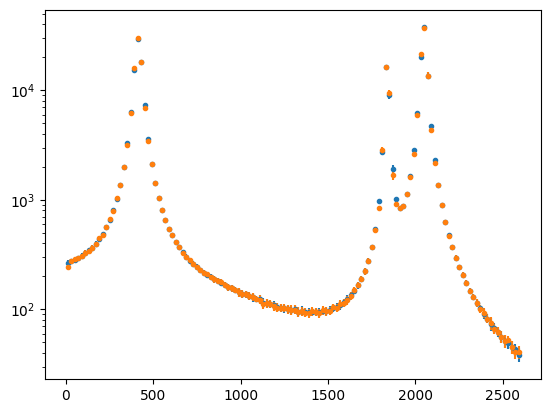

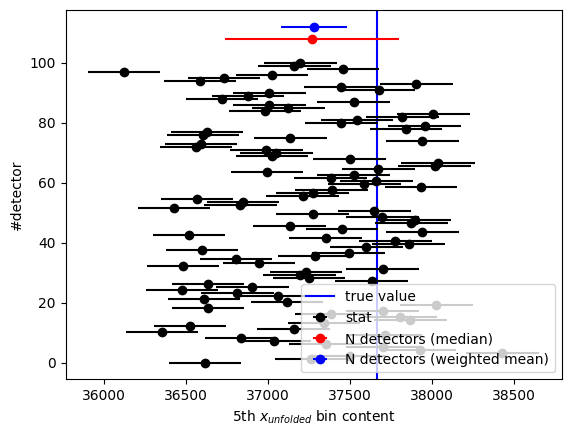

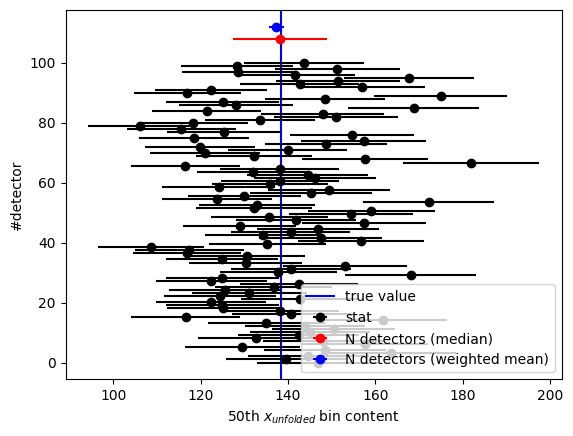

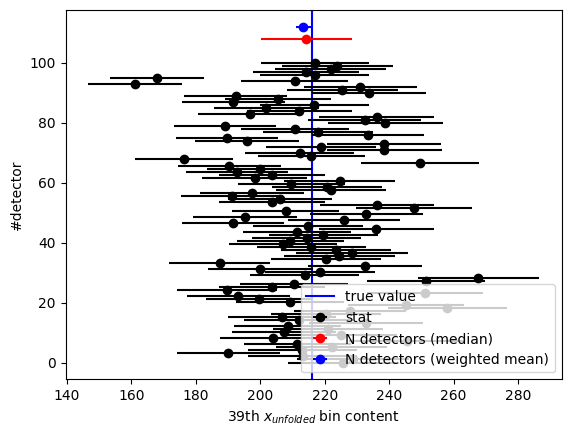

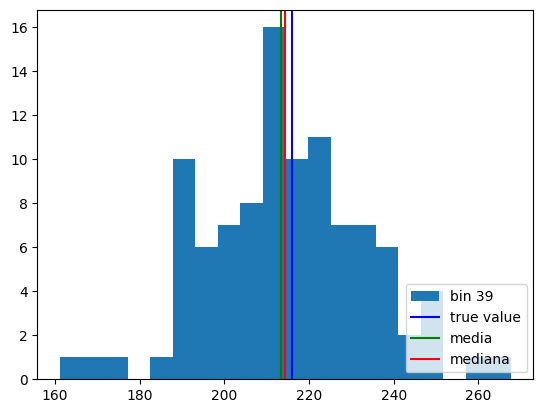

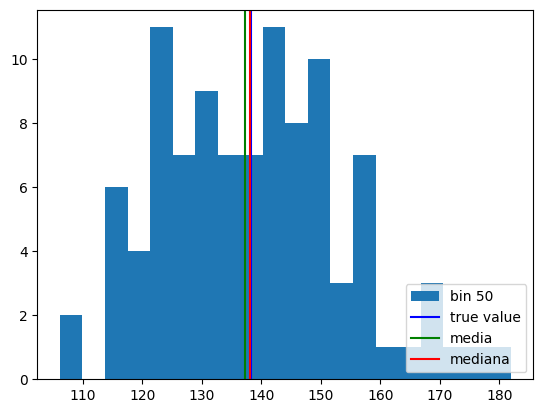

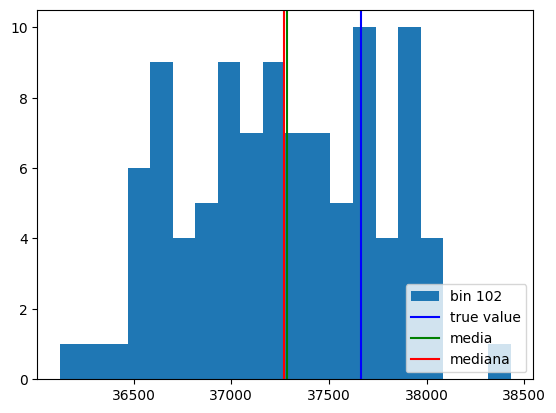

In [22]:
plt.figure(2)
plt.errorbar(bin_centers_x,x_final_test, marker=".", yerr=error_tot, linestyle="")
plt.errorbar(bin_centers_x,x_final, marker=".", yerr=error_tot, linestyle="")
plt.yscale("log")
plt.figure(66)
plt.axvline(x=x_final_test[102], color='b', label='true value')
plt.errorbar(x[:,102],N_d, xerr=err[:,102], linestyle="", marker="o", color="black", label="stat")
plt.errorbar(x_final[102],108, xerr=error_tot[102], linestyle="", marker="o", color="red", label="N detectors (median)")
plt.errorbar(xxx[102],112, xerr=errr[102], linestyle="", marker="o", color="blue", label="N detectors (weighted mean)")

plt.legend(loc="lower right")
plt.xlabel("5th $x_{unfolded}$ bin content")
plt.ylabel("#detector")
plt.savefig("/home/sara/Downloads/svdunfold_5th_bin.png")
plt.figure(67)
plt.axvline(x=x_final_test[50], color='b', label='true value')
plt.errorbar(x[:,50],N_d, xerr=err[:,50], linestyle="", marker="o", color="black", label="stat")
plt.errorbar(x_final[50],108, xerr=error_tot[50], linestyle="", marker="o", color="red", label="N detectors (median)")
plt.errorbar(xxx[50],112, xerr=errr[50], linestyle="", marker="o", color="blue", label="N detectors (weighted mean)")

plt.xlabel("50th $x_{unfolded}$ bin content")
plt.ylabel("#detector")
plt.legend(loc="lower right")
plt.savefig("/home/sara/Downloads/svdunfold_50th_bin.png")
plt.figure(68)
d=39
plt.axvline(x=x_final_test[d], color='b', label='true value')
plt.errorbar(x[:,d],N_d, xerr=err[:,d], linestyle="", marker="o", color="black", label="stat")
plt.errorbar(x_final[d],108, xerr=error_tot[d], linestyle="", marker="o", color="red", label="N detectors (median)")
plt.errorbar(xxx[d],112, xerr=errr[d], linestyle="", marker="o", color="blue", label="N detectors (weighted mean)")

plt.xlabel("39th $x_{unfolded}$ bin content")
plt.ylabel("#detector")
plt.legend(loc="lower right")
plt.savefig("/home/sara/Downloads/svdunfold_39th_bin.png")
plt.figure(69)
plt.hist(x[:,d], range=[np.min(x[:,d]),np.max(x[:,d])], bins=20,label="bin 39")
plt.axvline(x=x_final_test[d], color='b', label='true value')
plt.axvline(x=xxx[d], color='g', label='media')
plt.axvline(x=x_final[d], color='r', label='mediana')
plt.legend(loc="lower right")
plt.figure(79)
d=50
plt.hist(x[:,d], range=[np.min(x[:,d]),np.max(x[:,d])], bins=20,label="bin 50")
plt.axvline(x=x_final_test[d], color='b', label='true value')
plt.axvline(x=xxx[d], color='g', label='media')
plt.axvline(x=x_final[d], color='r', label='mediana')
plt.legend(loc="lower right")

plt.figure(89)
d=102
plt.hist(x[:,d], range=[np.min(x[:,d]),np.max(x[:,d])], bins=20,label="bin 102")
plt.axvline(x=x_final_test[d], color='b', label='true value')
plt.axvline(x=xxx[d], color='g', label='media')
plt.axvline(x=x_final[d], color='r', label='mediana')
plt.legend(loc="lower right")

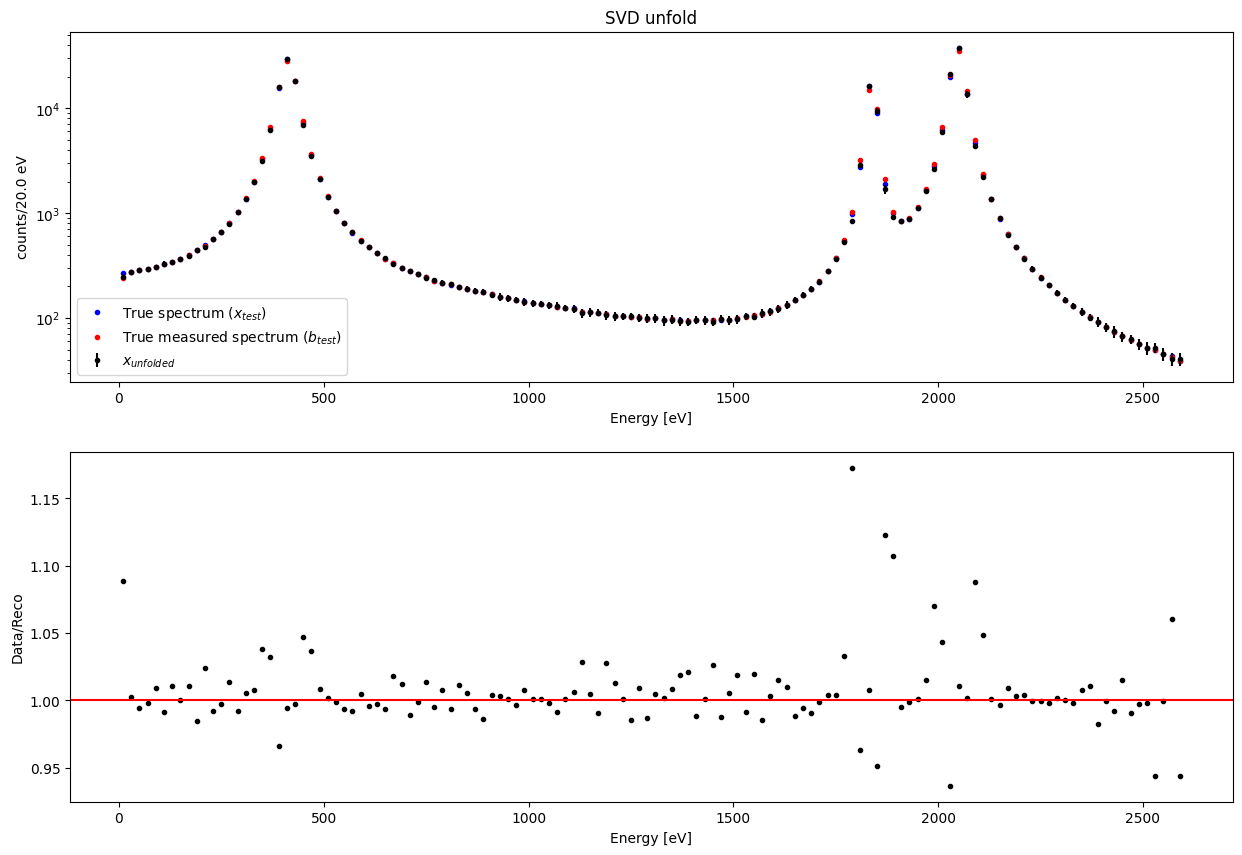

In [23]:
plt.subplots(2 , 1, figsize=(15, 10))
plt.subplot(2,1,1)
plt.plot(bin_centers_x, x_final_test, ".", color="blue", label="True spectrum ($x_{test}$)")
plt.plot(bin_centers_x, b_final_test, ".", color="red", label="True measured spectrum ($b_{test}$)")
plt.title("SVD unfold")

plt.errorbar(bin_centers_x, x_final, yerr=error_tot, label="$x_{unfolded}$" , marker='.', linestyle="", color="black")
plt.xlabel("Energy [eV]")
plt.ylabel("counts/{} eV".format((x_max-x_min)/x_nbins))
plt.legend()
plt.yscale("log")
plt.subplot(2,1,2)
plt.plot(bin_centers_x,(x_final_test/x_final), marker='.', linestyle="", color="black")
plt.xlabel("Energy [eV]")
plt.ylabel("Data/Reco")
plt.axhline(y=1, color="red")
plt.savefig("/home/sara/Downloads/svdunfold_20detector.png")

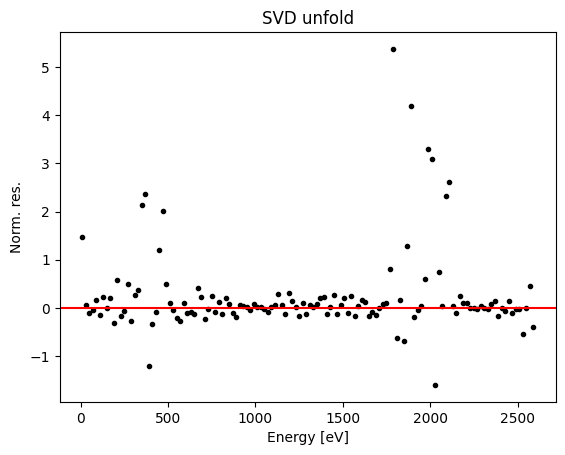

In [24]:
plt.figure(25)
plt.title("SVD unfold")

plt.xlabel("Energy [eV]")
plt.plot(bin_centers_x,(x_final_test-x_final)/error_tot, marker='.', linestyle="", color="black")
plt.xlabel("Energy [eV]")
plt.ylabel("Norm. res.")
plt.axhline(y=0, color="red")
plt.savefig("/home/sara/Downloads/svdunfold_bias_20dec.png")
plt.show()